# Reservation d'hotel

## Description
**Objectif:** Le but ici est de prédire si une personne va honorer sa réservation ou pas selon différents critères ou
features. C’est une tâche supervisée de classification binaire, car on a deux classes : “cancelled” et
“not cancelled”.


**Lien du dataset:** https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

**Modèle:** Perceptron à une couche VS Random Forest Classifier

## Membres de l'équipe
* M’hamed KHOUBABA
* Ridouane OUSMANE DOUDOU
* Henintsoa Micaël ANDRIAMAHADIMBY

## Importation des bibliothèques

In [253]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

## Jeu de données

In [2]:
data = pd.read_csv("Hotel_Reservations.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Visualisation et analyse des données

### Caractéristiques générales du dataset
Tout d'abord, nous allons voir les informations gérérales du dataset, comme le nombre de lignes, le nombre de colonnes, le type des valeurs, l'existence de valeur null ou pas

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

D'après ce résultat, on voit que:
* Il y a 36275 lignes
* Il y a 19 colonnes
* Aucune ligne n'a une valeur nulle
* Les types des valeurs sont généralement des **int/float** sauf pour les colonnes: *type_of_meal_plan, room_type_reserved, market_segment_type, et market_segment_type* dont le type est du **string**

In [4]:
# Définition fonction de visualisation histogramme
def visualiser_histo(ax, data, title, xlabel="Valeurs", ylabel="Nombre de clients", bins=10):
    ax.hist(data, bins=bins)
    # Ajouter des titres et des légendes
    ax.set_title(title, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=9)
    ax.set_ylabel(ylabel, fontsize=9)

# Définition fonction de visualisation en piechart    
def visualiser_piechart(ax, data, title, seuil=0.1):
    # Compter le nombre d'occurence pour chaque valeur
    nb_occurence = data.value_counts(normalize=True)

    # Pour ne pas saturer le graphe, regrouper les labels avec une proportion inférieure à 10% par le label "Other"
    other = nb_occurence[nb_occurence < seuil].sum() # Somme des pourcentage < seuil%
    nb_occurence = nb_occurence[~(nb_occurence < seuil)] # Enlever les labels dont le pourcentage est < seuil%
    if other > 0:
        nb_occurence['Other'] = other

    # Créer le pie chart sur l'axe fourni en paramètre
    ax.pie(nb_occurence.values, labels=nb_occurence.index, autopct='%1.1f%%')
    ax.set_title(title, fontsize=10)

### Distribution des données

In [5]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Point de vigilance sur la distribution de données
D'après la description des données, on remarque que certaines colonnes ont un écart-type plus élevé que la moyenne et la colonne *arrival_year* a un écart-type extrêmement négligeable par rapport à sa moyenne. 

Nous allons ainsi, visualiser ces données à l'aide d'un graphe pour voir leurs distributions.

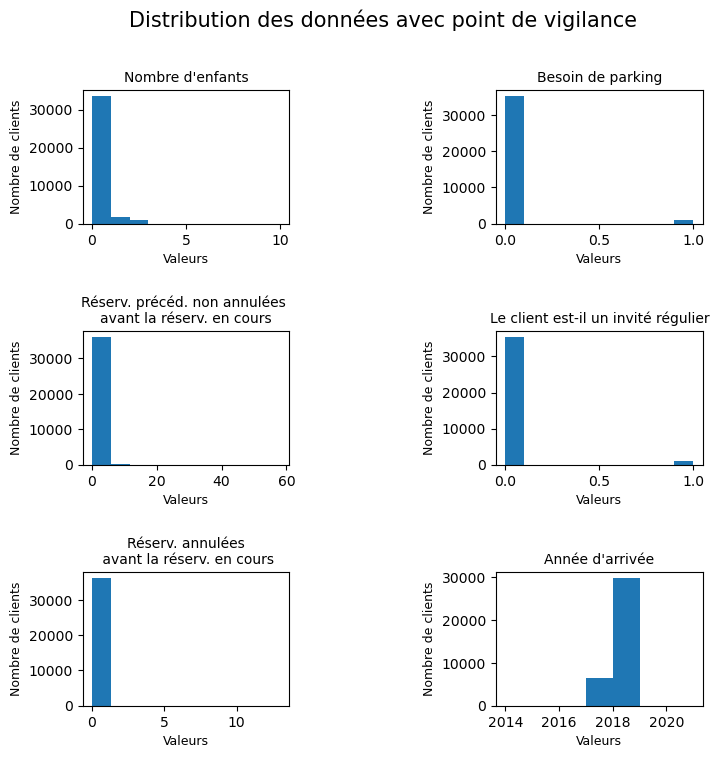

In [6]:
myfig, ax1 = plt.subplots(nrows = 3, ncols = 2, figsize=(8,8))
myfig.subplots_adjust(wspace=1, hspace=0.8)
myfig.suptitle("Distribution des données avec point de vigilance", fontsize=15)

visualiser_histo(ax1[0,0], data["no_of_children"], "Nombre d'enfants")
visualiser_histo(ax1[0,1], data["required_car_parking_space"], "Besoin de parking")
visualiser_histo(ax1[1,0], data["no_of_previous_bookings_not_canceled"], "Réserv. précéd. non annulées \navant la réserv. en cours")
visualiser_histo(ax1[1,1], data["repeated_guest"], "Le client est-il un invité régulier")
visualiser_histo(ax1[2,0], data["no_of_previous_cancellations"], "Réserv. annulées\n avant la réserv. en cours")
visualiser_histo(ax1[2,1],data["arrival_year"], "Année d'arrivée", bins=range(2014,2022))

D'après les graphes si dessus, on voit bien que la distribution des données est déséquilibrée, il n'y a quasiment qu'une partie (ou classe) prédominant. Ainsi, il ne serait pas pertinent de garder ces données, car elles n'influenceront pas le résultat.

Pour l'année d'arrivée, il est préferable de ne pas la prendre en compte car elle concerne que l'année 2017 et 2018, alors qu'on souhaite prédire toutes les réservations pour n'importe quelle année.

### Distribution des données restantes
Nous allons maintenant voir la distribution des données restantes

#### Distribution des données de type int/float

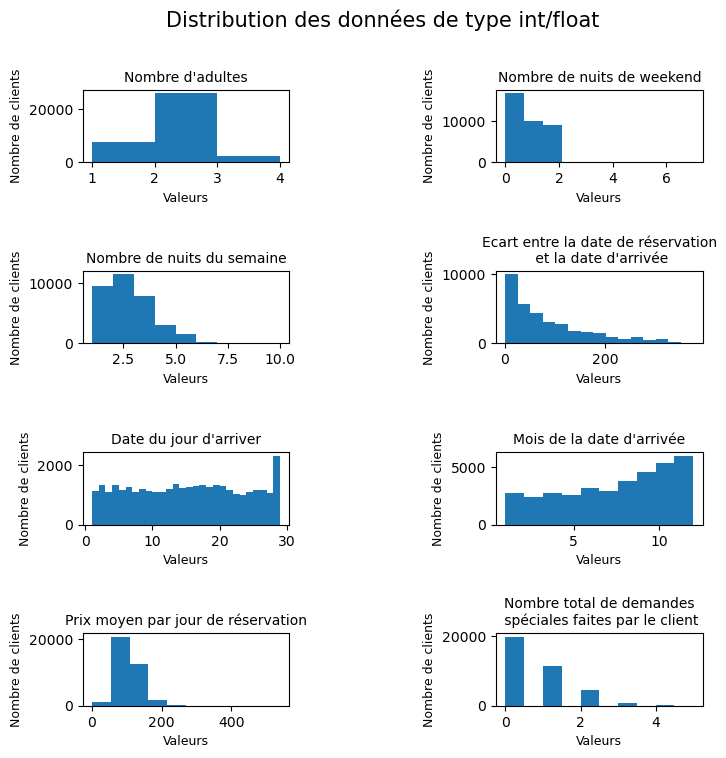

In [7]:
myfig, ax1 = plt.subplots(nrows = 4, ncols = 2, figsize=(8,8))
myfig.subplots_adjust(wspace=1, hspace=1.5)
myfig.suptitle("Distribution des données de type int/float", fontsize=15)
visualiser_histo(ax1[0,0], data["no_of_adults"], "Nombre d'adultes", bins=range(1,5))
visualiser_histo(ax1[0,1], data["no_of_weekend_nights"], "Nombre de nuits de weekend")
visualiser_histo(ax1[1,0], data["no_of_week_nights"], "Nombre de nuits du semaine", bins=range(1,11))
visualiser_histo(ax1[1,1], data["lead_time"], "Ecart entre la date de réservation\n et la date d'arrivée", bins=range(1,400,25))
visualiser_histo(ax1[2,0], data["arrival_date"], "Date du jour d'arriver", bins=range(1,30))
visualiser_histo(ax1[2,1], data["arrival_month"], "Mois de la date d'arrivée")
visualiser_histo(ax1[3,0], data["avg_price_per_room"], "Prix moyen par jour de réservation")
visualiser_histo(ax1[3,1], data["no_of_special_requests"], "Nombre total de demandes\n spéciales faites par le client")

#### Distribution des données de type string
Dans cette partie, nous allons regrouper les valeurs dont le pourcentage est inférieur à 10%, déjà pour ne pas saturé le graphe, mais aussi pour faciliter le classemment lorsqu'on fera le pré-traitement. En effet, le pourcentage de chaque valeur du classe other est minime, de ce fait, c'est mieux de les regrouper.

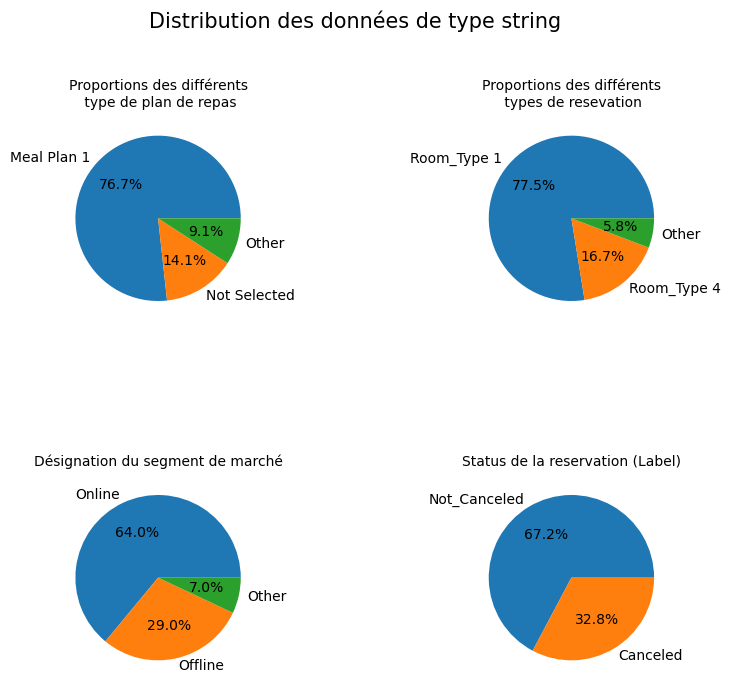

In [8]:
myfig, ax1 = plt.subplots(nrows = 2, ncols = 2, figsize=(8,8))
myfig.subplots_adjust(wspace=1, hspace=0.4)
myfig.suptitle("Distribution des données de type string", fontsize=15)
visualiser_piechart(ax1[0,0], data["type_of_meal_plan"], "Proportions des différents\n type de plan de repas")
visualiser_piechart(ax1[0,1], data["room_type_reserved"], "Proportions des différents\n types de resevation")
visualiser_piechart(ax1[1,0], data["market_segment_type"], "Désignation du segment de marché")
visualiser_piechart(ax1[1,1], data["booking_status"], "Status de la reservation (Label)")

## Pré-traitement

### Transformation des données de type **string**

Changer le label booking_status: 
* not_cancelled en 0
* cancelled en 1

In [9]:
data["booking_status"] = data["booking_status"].replace({"Not_Canceled": 0, "Canceled": 1})

Les colonnes suivantes sont représentées par trois classes (principale_1, principale_2, other). De ce fait, nous allons transformer la colonne d'origine par deux colonnes dont le nom sera la valeur des deux principales classes. Pour représenter la classe other, on met 0 comme valeur au deux colonnes principales.

In [10]:
def encode_string(data, nom_col_original, nouveau_nom_col, nom_col_suivant, val1, val2):
    # Obtenir l'index de la colonne originale
    if nom_col_original not in data.columns:
        raise Exception(f"La colonne '{nom_col_original}' ne fait pas partie de data")

    index = data.columns.get_loc(nom_col_original)

    # Dupliquer la colonne juste à coté d'elle  
    data.insert(index+1, nom_col_suivant, data[nom_col_original])
    
    # Changer les valeurs de la colonne originale et de la colonne suivante
    data[nom_col_original] = data[nom_col_original].replace({val1: 1})
    data[nom_col_suivant] = data[nom_col_suivant].replace({val2: 1})
    
    # Changer les autres valeurs en 0
    data[nom_col_original] = data[nom_col_original].mask(data[nom_col_original] != 1, 0)
    data[nom_col_suivant] = data[nom_col_suivant].mask(data[nom_col_suivant] != 1, 0)
    
    # Renommer la colonne originale avec le nouveau nom
    data.rename(columns={nom_col_original: nouveau_nom_col}, inplace=True)

# Traitement type_of_meal_plan
encode_string(data, nom_col_original="type_of_meal_plan", nouveau_nom_col="meal_plan_1",\
        nom_col_suivant="not_selected_type_plan", val1="Meal Plan 1", val2="Not Selected")

# Traitement room_type_reserved
encode_string(data, nom_col_original="room_type_reserved", nouveau_nom_col="room_type_1",\
        nom_col_suivant="room_type_4", val1="Room_Type 1", val2="Room_Type 4")

# Traitement market_segment_type
encode_string(data, nom_col_original="market_segment_type", nouveau_nom_col="online",\
        nom_col_suivant="offline", val1="Online", val2="Offline")

### Supression des colonnes non pertinentes

In [11]:
# Suppression des colonnes non pertinentes
feature_a_supprimer = ["Booking_ID", "no_of_children", "required_car_parking_space", "arrival_year",\
                       "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled",\
                      ]
for feature in feature_a_supprimer:
    if feature in data.columns:
        data = data.drop(feature, axis=1) # Supprimer la colonne feature

In [12]:
data.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,meal_plan_1,not_selected_type_plan,room_type_1,room_type_4,lead_time,arrival_month,arrival_date,online,offline,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,1,0,224,10,2,0,1,65.00,0,0
1,2,2,3,0,1,1,0,5,11,6,1,0,106.68,1,0
2,1,2,1,1,0,1,0,1,2,28,1,0,60.00,0,1
3,2,0,2,1,0,1,0,211,5,20,1,0,100.00,0,1
4,2,1,1,0,1,1,0,48,4,11,1,0,94.50,0,1


### Séparation des features et du label

In [13]:
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

### Normalisation des données

In [14]:
# Normalisation
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,meal_plan_1,not_selected_type_plan,room_type_1,room_type_4,lead_time,arrival_month,arrival_date,online,offline,avg_price_per_room,no_of_special_requests
0,0.50,0.142857,0.117647,1.0,0.0,1.0,0.0,0.505643,0.818182,0.033333,0.0,1.0,0.120370,0.0
1,0.50,0.285714,0.176471,0.0,1.0,1.0,0.0,0.011287,0.909091,0.166667,1.0,0.0,0.197556,0.2
2,0.25,0.285714,0.058824,1.0,0.0,1.0,0.0,0.002257,0.090909,0.900000,1.0,0.0,0.111111,0.0
3,0.50,0.000000,0.117647,1.0,0.0,1.0,0.0,0.476298,0.363636,0.633333,1.0,0.0,0.185185,0.0
4,0.50,0.142857,0.058824,0.0,1.0,1.0,0.0,0.108352,0.272727,0.333333,1.0,0.0,0.175000,0.0


## Train, Validation et test

### Séparation train 80% et test 20%

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Perceptron
Pour trouver le bon **eta**, on va faire une **cross validation de 5-fold** pour chaque eta de 0.05 à 1.5 avec 0.05 pas. Le métrique utiliser pour la mesure est **l'accuracy**. Après, on va afficher pour chaque eta, la moyenne de chaque des 5-folds afin de trouver le bon eta

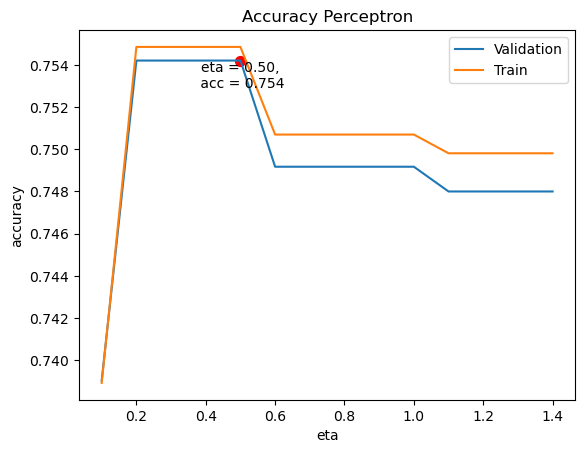

In [230]:
# Train et validation
eta_range = np.arange(0.1, 1.5, 0.1)

model = Perceptron()
# Cross Validation 5-folds avec accuracy comme metrique et eta (eta0) comme hyper-paramètre
# n_jobs indique au programme d'utiliser tous mes processeurs
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
train_scores, test_scores = validation_curve(model, X_train, y_train, param_name="eta0",\
                                             param_range=eta_range, scoring='accuracy', cv=5, n_jobs=-1)

plt.plot(eta_range, test_scores.mean(axis=1), label='Validation')
plt.plot(eta_range, train_scores.mean(axis=1), label='Train')

# Afficher le eta que nous avons choisi
best_eta = 0.5
best_eta_index = np.where(eta_range == best_eta)[0][0]
best_acc = test_scores.mean(axis=1)[best_eta_index]
plt.scatter(eta_range[best_eta_index], best_acc, color='red', marker='o', s=50)
plt.text(eta_range[best_eta_index], best_acc, f"eta = {best_eta:.2f},\n acc = {best_acc:.3f}", ha='center', va='top')

plt.ylabel('accuracy')
plt.xlabel('eta')
plt.legend(loc='best')
plt.title('Accuracy Perceptron')
plt.savefig("Accuracy-Perceptron.jpg")

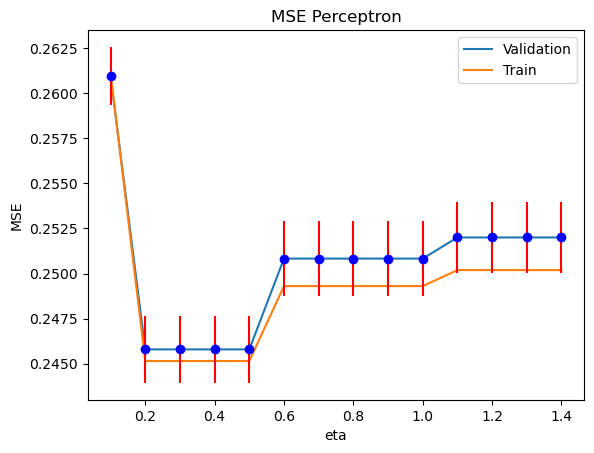

In [266]:
# Definition de MSE en tant que scoring
mse = make_scorer(mean_squared_error)

train_scores, test_scores = validation_curve(model, X_train, y_train, param_name="eta0",\
                                             param_range=eta_range, scoring=mse, cv=5, n_jobs=-1)

plt.plot(eta_range, test_scores.mean(axis=1), label='Validation')
plt.plot(eta_range, train_scores.mean(axis=1), label='Train')

# Calcul de la moyenne et de la variance de l'erreur
mean_scores = np.mean(test_scores, axis=1)
var_scores = np.var(test_scores, axis=1)

# Affichage des barres verticals représentant la variance du MSE
plt.errorbar(eta_range, mean_scores, yerr=var_scores, fmt='o', color='b',
             ecolor='red', elinewidth=1.5, capsize=0)

plt.ylabel('MSE')
plt.xlabel('eta')
plt.legend(loc='best')
plt.title('MSE Perceptron')
plt.savefig("MSE-Perceptron.jpg")

In [267]:
print(mean_scores[1])
print(var_scores[1])

0.24579600275671948
0.0018589641593216681


Temps de fit : 0.03 secondes
Score: 0.7503790489317712


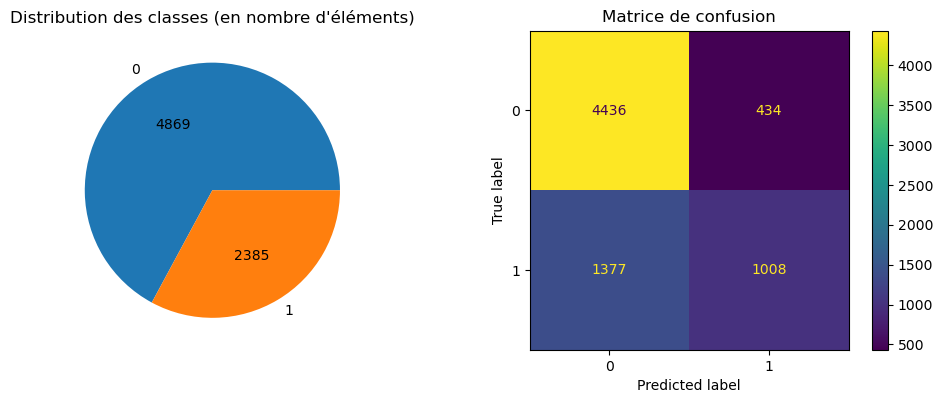

<Figure size 640x480 with 0 Axes>

In [262]:
# Apprentissage puis prediction avec les 20% de test avec le meilleur eta == best_eta
model = Perceptron(eta0=best_eta)

# Enregistrer le temps de début
start_time = time.time()

# Apprentissage
model.fit(X_train, y_train)

# Enregistrer le temps de fin
end_time = time.time()

# Calculer le temps de fit en soustrayant le temps de début du temps de fin
fit_time = end_time - start_time
print("Temps de fit : {:.2f} secondes".format(fit_time))

# Prediction
y_pred = model.predict(X_test)
# Scoring
score = model.score(X_test, y_test)
print("Score:", score)

# Matrice de confusion
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
myfig, ax1 = plt.subplots(ncols=2, figsize=(10, 4))

# Plot Piechar de y_test
# autopct=lambda x : int(x*len(y_test)/100) pour avoir les valeurs dans le graphe au lieu des pourcentages
ax1[0].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct=lambda x : int(x*len(y_test)/100))
ax1[0].set_title("Distribution des classes (en nombre d'éléments)")


# Plot de la matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax1[1])
ax1[1].set_title('Matrice de confusion')

plt.tight_layout()
plt.show()

plt.savefig("Score-Perceptron.jpg")

### Random Forest Classifier

De même, pour trouver la bonne valeur des hyper-paramètres, on va faire une cross-validation de 5-fold, avec l'accuracy comme métrique.
Les hyper-paramètres qu'on souhaite optimister sont: 
* n_estimators: le nombre d'arbre dans la forets
* max_depth: la profondeur de chaque arbre

Nous allons d'abord chercher à optimiser max_depth pour vérifier un éventuel overfitting, puis n_estimator pour réduire le temps de calcul

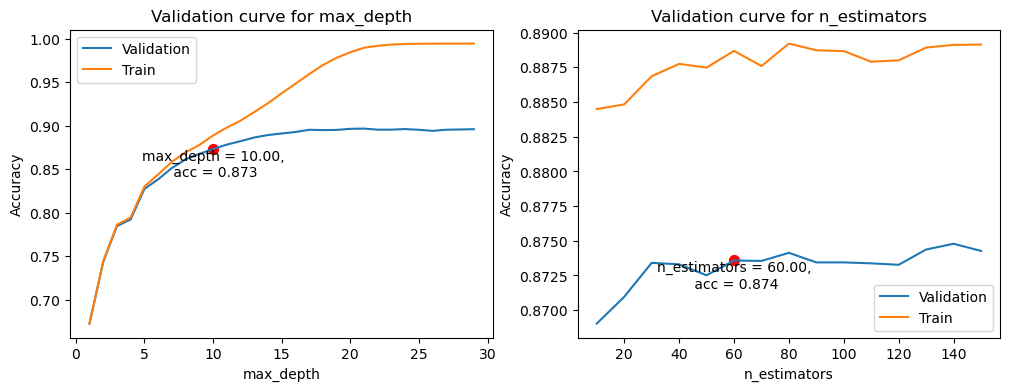

<Figure size 640x480 with 0 Axes>

In [252]:
# RadomForest
# Range de max_depth à tester: 0 à 30 avec un step de 1
max_depth_range = np.arange(0, 30, 1)

# Range de n_estimators à tester: 0 à 150 avec un step de 10
n_estimators_range = np.arange(0, 151, 10)

# Cross Validation 5-folds avec accuracy comme metrique et max_depth comme hyper-paramètre
# n_jobs indique au programme d'utiliser tous mes processeurs
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
train_scores, test_scores = validation_curve(RandomForestClassifier(), X_train, y_train, 
                                                         param_name="max_depth", param_range=max_depth_range, 
                                                         scoring='accuracy', cv=5, n_jobs=-1)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(max_depth_range, test_scores.mean(axis=1), label='Validation')
plt.plot(max_depth_range, train_scores.mean(axis=1), label='Train')
plt.title("Validation curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")

# Afficher le max_depth que nous avons choisi
best_max_depth = 10
best_max_depth_index = np.where(max_depth_range == best_max_depth)[0][0]
best_acc = test_scores.mean(axis=1)[best_max_depth_index]
plt.scatter(max_depth_range[best_max_depth_index], best_acc, color='red', marker='o', s=50)
plt.text(max_depth_range[best_max_depth_index], best_acc, f"max_depth = {best_max_depth:.2f},\n acc = {best_acc:.3f}", ha='center', va='top')

# On a pris 10 comme max_depth, maintenant, on va chercher le bon n_estimator (nombre d'abre dans la foret)
# Pour un max_depth = 10
train_scores, test_scores = validation_curve(RandomForestClassifier(max_depth=best_max_depth), X_train, y_train, 
                                                      param_name="n_estimators", param_range=n_estimators_range, 
                                                      scoring='accuracy', cv=5, n_jobs=-1)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, test_scores.mean(axis=1), label='Validation')
plt.plot(n_estimators_range, train_scores.mean(axis=1), label='Train')
plt.title("Validation curve for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best")

# Afficher le n_estimators que nous avons choisi
best_n_estimators = 60
best_n_estimators_index = np.where(n_estimators_range == best_n_estimators)[0][0]
best_acc = test_scores.mean(axis=1)[best_n_estimators_index]
plt.scatter(n_estimators_range[best_n_estimators_index], best_acc, color='red', marker='o', s=50)
plt.text(n_estimators_range[best_n_estimators_index], best_acc, f"n_estimators = {best_n_estimators:.2f},\n acc = {best_acc:.3f}", ha='center', va='top')

plt.show()

plt.savefig("Accuracy-RandomForest.jpg")

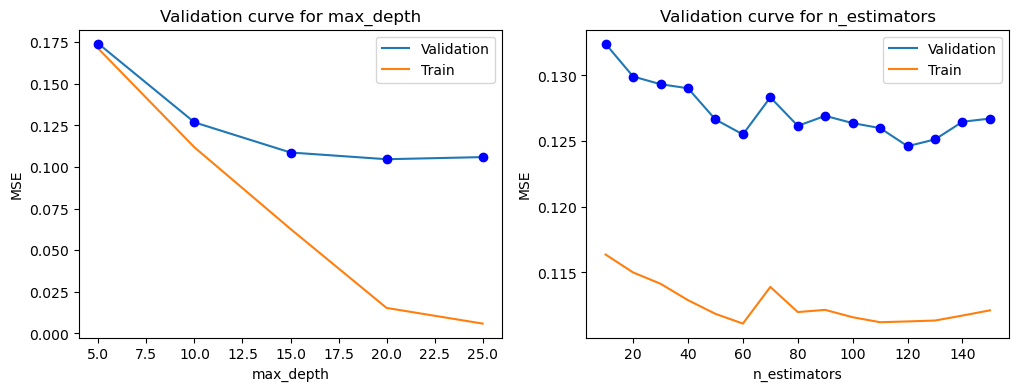

<Figure size 640x480 with 0 Axes>

In [251]:
# RadomForest
# Range de max_depth à tester: 0 à 30 avec un step de 5
max_depth_range = np.arange(0, 30, 5)

# Range de n_estimators à tester: 0 à 150 avec un step de 10
n_estimators_range = np.arange(0, 151, 10)

# Définir MSE comme scoring
mse = make_scorer(mean_squared_error)
train_scores, test_scores = validation_curve(RandomForestClassifier(), X_train, y_train, 
                                                         param_name="max_depth", param_range=max_depth_range, 
                                                         scoring=mse, cv=5, n_jobs=-1)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(max_depth_range, test_scores.mean(axis=1), label='Validation')
plt.plot(max_depth_range, train_scores.mean(axis=1), label='Train')
plt.title("Validation curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.legend(loc="best")

# Calcul de la moyenne et de la variance de l'erreur
mean_scores = np.mean(test_scores, axis=1)
var_scores = np.var(test_scores, axis=1)

# Affichage des barres verticals représentant la variance du MSE
plt.errorbar(max_depth_range, mean_scores, yerr=var_scores, fmt='o', color='b',
             ecolor='lightblue', elinewidth=1.5, capsize=0)

# On a pris 10 comme max_depth, maintenant, on va chercher le bon n_estimator (nombre d'arbre dans la foret)
# Pour un max_depth = 10
train_scores, test_scores = validation_curve(RandomForestClassifier(max_depth=best_max_depth), X_train, y_train, 
                                                      param_name="n_estimators", param_range=n_estimators_range, 
                                                      scoring=mse, cv=5, n_jobs=-1)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, test_scores.mean(axis=1), label='Validation')
plt.plot(n_estimators_range, train_scores.mean(axis=1), label='Train')
plt.title("Validation curve for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("MSE")
plt.legend(loc="best")

# Calcul de la moyenne et de la variance de l'erreur
mean_scores = np.mean(test_scores, axis=1)
var_scores = np.var(test_scores, axis=1)

# Affichage des barres verticals représentant la variance du MSE
plt.errorbar(n_estimators_range, mean_scores, yerr=var_scores, fmt='o', color='b',
             ecolor='lightblue', elinewidth=1.5, capsize=0)

plt.show()

plt.savefig("MSE-RandomForest.jpg")

In [237]:
print(var_scores)

[           nan 1.84216688e-05 4.16666469e-05 2.22831660e-05
 3.48793413e-05 3.41858867e-05 3.55395480e-05 2.48812459e-05]


Temps de fit : 0.83 secondes
Score: 0.8661612680909717


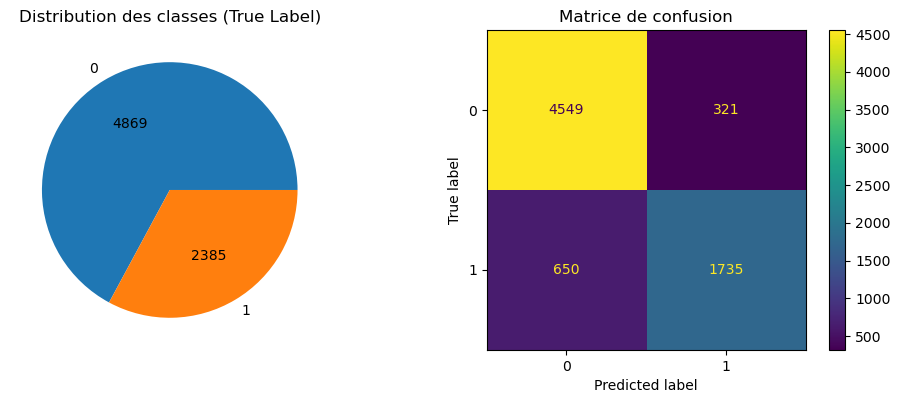

<Figure size 640x480 with 0 Axes>

In [261]:
# Apprentissage avec les bons hyperparametres
model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

# Enregistrer le temps de début
start_time = time.time()

# Apprentissage
model.fit(X_train, y_train)

# Enregistrer le temps de fin
end_time = time.time()

# Calculer le temps de fit en soustrayant le temps de début du temps de fin
fit_time = end_time - start_time
print("Temps de fit : {:.2f} secondes".format(fit_time))

# Prediction
y_pred = model.predict(X_test)

# Scoring
score = model.score(X_test, y_test)
print("Score:", score)

# Matrice de confusion
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
myfig, ax1 = plt.subplots(ncols=2, figsize=(10, 4))

# Plot Piechar de y_test
# autopct=lambda x : int(x*len(y_test)/100) pour avoir les valeurs dans le graphe au lieu des pourcentages 
ax1[0].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct=lambda x : int(x*len(y_test)/100))
ax1[0].set_title("Distribution des classes (True Label)")


# Plot de la matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax1[1])
ax1[1].set_title('Matrice de confusion')

plt.tight_layout()
plt.show()

plt.savefig("Score-RandomForest.jpg")

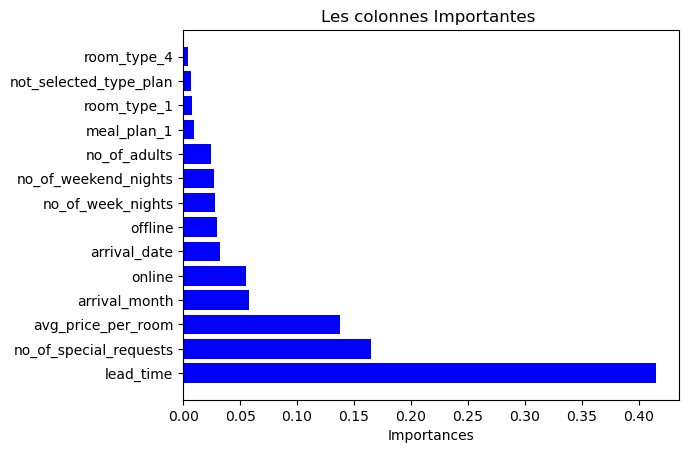

In [239]:
features = data.columns
importance = model.feature_importances_ 
indices = np.argsort(importance)

plt.title("Les colonnes Importantes ")
plt.barh(range(len(indices)),importance[indices][::-1], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices[::-1]])
plt.xlabel("Importances")
plt.show()